<a href="https://colab.research.google.com/github/LilSagi/Heart-failure-predictive-system/blob/main/Heart_failure_predictive_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Failure Predictive System**

Cardiovascular diseases are , which cause around 17.9 million deaths per year, are defined as the leading cause of death worldwide. (Cardiovascular Diseases, n.d.)

Heart failure is a common complication of cardiovascular disease. It is also known as congestive heart failure or congestive cardiac failure, is the condition when the heart is unable to provide the sufficient amount of blood for the needs of the body. (Heart Failure - What Is Heart Failure?, 2022)

By tackling behavioral risk factors like smoking addiction, poor eating habits and obesity, sedentary, and excessive alcohol use, the plurality of cardiovascular disorders can be avoided. However, with patients who are suffering from cardiovascular diseases or at its high risk, a contemporary solution like a machine learning model would be very useful regarding to early detection and management of the patient’s medical care. 

This project aims to create a system which would assess and predict the decease of patients caused by heart failure based on clinical records' attributes. The predictive system is built by training the model from a machine learning classification algorithm namely Logistics Regression. 

Hospitals can use this to assess the urgency of patients with cardiovascular problems based on their medical records' values. This not only helps improving the quality and accuracy of clinical treatment but also relieve burdens on medical care of the hospital. 



#**Approaches to solve the problem**

##Method: Logistics Regression

Logistic regression is a machine learning algorithm that is used to predict a target variable. It can be applied to supervised learning problems involving classification, and the output would be in the binary format, for example, Yes or No, Success or Failure, 0 or 1. 

In result, I choose Logistics Regression as an approach to this predictive system as the prediction would return the result based on classification. (Machine Learning - Logistic Regression, n.d.)


##Overview of project workflow
**Importing:** 

Importing libraries with necessary functions and algorithms. 

**Data understanding:**

The dataset is collected, loaded and explored. Data is also checked and cleaned if there are any missing or corrupted values. 

**Data preparing:**

The processed data is divided into two sets: testing and training from which we could build the predictive model. 

**Evaluate:**

The accuracy score of the model is calculated for further assessments on effectiveness and correctness. 

**Predictive model:**

The evaluated model will be used to predict the mortality of a patient from random values of variables. 

**Reflection:**

Challenges and further improvements for future projects.


#**Data Description**

The dataset is collected from the archive of UC Irvine Machine Learning Repository. It comprises of clinical records of **299** patients who has been suffering from heart failure's symptoms. Each profile is collected with **13** medical features. Based on those attributes, the risk of heart failure leading to patient's mortality possibility will be predicted. 


**Thirteen clinical features included in the dataset stand for:**
(Heart Failure Clinical Records Data Set, 2020)

**age:** 

The age of the patient (in years).

**anaemia:** 

The condition of decreasing red blood cells or hemoglobin. 

**high blood pressure:**

If the patient has hypertension. 

**creatinine phosphokinase (CPK):**

Level of the CPK enzyme in the blood (mcg/L). 

*This enzyme derives creatin in the blood. If this index is high, the patient is injured or some skeletal tissues, heart or brain is damaged which put the patient in mortal danger.*

**diabetes:**

If the patient has diabetes. 

*If the patient has diabetes in the medical history, the risk of cardiovascular complications or stroke would be higher.*

**ejection fraction:**

Percentage of blood leaving the heart at each contraction (percentage).

*The normal percentage of ejection fraction is 50-75%. The lower the index gets, the higher the risk of heart failure occurs. The higher the index gets, the higher the risk of heart attack occurs.*

**platelets:**

Platelets in the blood (kiloplatelets/mL).

*The main function of platelets is hemostasis. The normal number is 150,000 - 450,000 kiloplatelets/mL. Lower index will cause hemophilia which means it is hard for blood to stop bleeding in wounds or cuts. Higher index, in contrast, makes it easier to form blood clots which cause stroke.*

**sex:**

Woman or man 

**serum creatinine:**

Level of serum creatinine in the blood (mg/dL).

*For male adults, the standard index is from 0.74 to 1.35 mg/dL. For female adults, the index is from 0.59 to 1.04 mg/dL. When the index increases, it means there are problems with patients' kidneys.*

**serum sodium:**'

Level of serum sodium in the blood (mEq/L).

*The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L). If this index gets lower than the standard level, it cause Hyponatremia which is a complication of hormonal disorders resulted from heart failure. It leads to fatigue, headache, nausea, loss of energy, seizures and even coma.*

**smoking:**

If the patient smokes or not. 


**time:**

Follow-up period (days).

**death event:**

If the patient deceased during the follow-up period

#**Importing required libraries**
In this part, libraries are installed and imported.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.mlab as mlab

In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [4]:
from sklearn.metrics import confusion_matrix, classification_report 

#**Data understanding: data collection and exploring**

In [5]:
#Loading the csv data to a pandas dataframe
rawdata = pd.read_csv('/content/Heart failure.csv')

In [ ]:
#Print first 5 rows of the data set 
rawdata.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Print the last 5 rows of the data set
rawdata.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
#General information of dataset
print("Number of instances and attributes:", rawdata.shape)
print('Dataset columns:',rawdata.columns)
print('Data types of each attribute: ', rawdata.info())

Number of instances and attributes: (299, 13)
Dataset columns: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-


* The shape of the data set is **299 rows with 13 columns** which demonstrates clinical records of 13 attributes of 299 patients. 
* The name of 13 variables are: **age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets,   serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT.**
* All values are in numeric format: **floats and integers.**








In [ ]:
#Checking for missing values in columns
print("NULL values in each attribute")
rawdata.isnull().sum()

NULL values in each attribute


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In data understanding, an indispensable step is to check and identify if there are any missing values in the dataset. Without this step, conclusions and inferences drawn from data will be inaccurate or biased. **From the outcome, it is clear that this is a clean dataset without any missing values.**

In [ ]:
#Statistical measures about the data
rawdata.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#Explore dataset with visualizations 
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium","time"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

For assessing the distribution of the data set, 13 variables are split into 2 types of features: **numerical and categorical** as shown in the code chunk above. DEATH_EVENT is not included in both groups as it is the dependent variable.

As the aim is to see the data distribution via visualization charts, all attributes are not normalized for this part. 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions

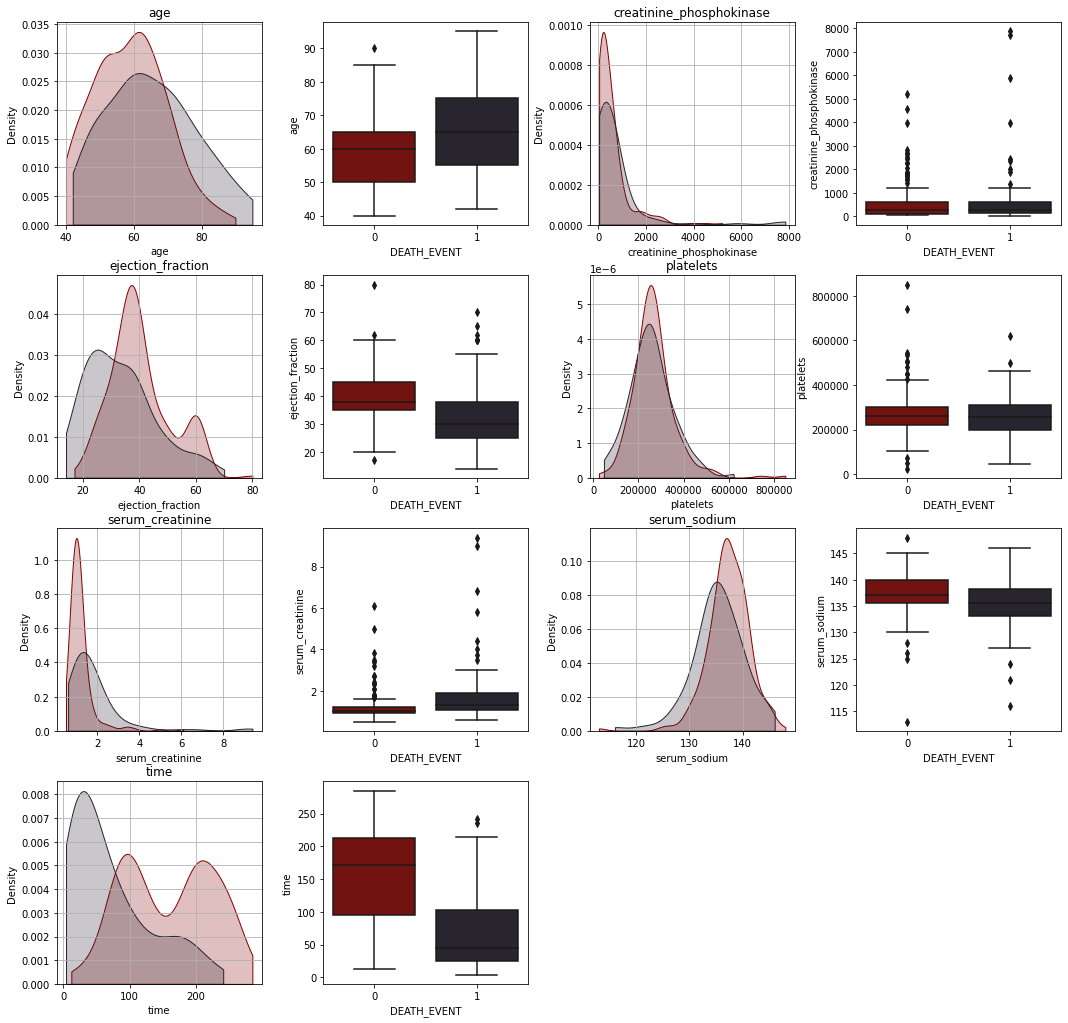

In [ ]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sn.kdeplot(rawdata.loc[rawdata["DEATH_EVENT"]==0, col], label="alive", color = "#830301", shade=True, kernel='gau', cut=0)
    sn.kdeplot(rawdata.loc[rawdata["DEATH_EVENT"]==1, col], label="dead",  color = "#292330", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sn.boxplot(y = col, data = rawdata, x="DEATH_EVENT", palette = ["#830301", "#292330"])   

As we can see already from the distribution plots of unnormalized features, some inferences could be drawn as follows:

* **Age** data is left- skewed, very few outliers and ranges around 60.
* **Creatinine phosphokinase** is left- skewed, multiple outliers and ranges around 250.
* **Ejection fraction** is left- skewed with a few outliers and ranges around 38.
* **Platelets** is left-skewed, numerous outliers and ranges around 262,000.
* **Serum creatinine** is left- skewed, numerous outliers and ranges around 1.1.
* **Serum sodium** is right-skewed with some outliers and ranges around 136- 137. 
* **Time** is left- skewed with some outliers and ranges around 115.  


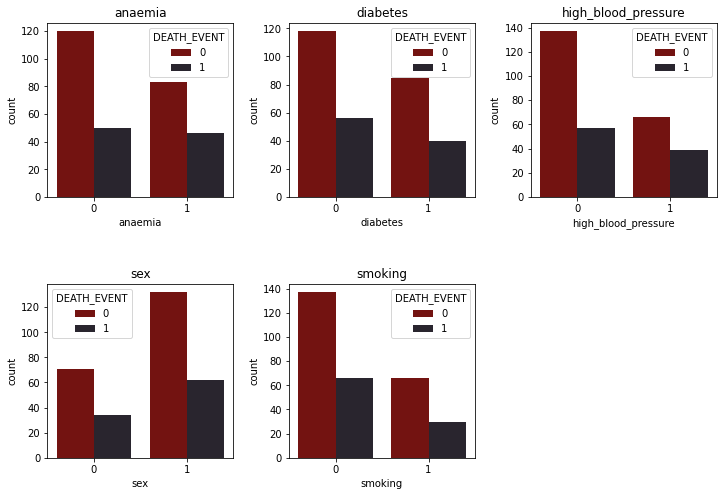

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sn.countplot(data=rawdata, x=col, hue="DEATH_EVENT", palette = ["#830301", "#292330"])

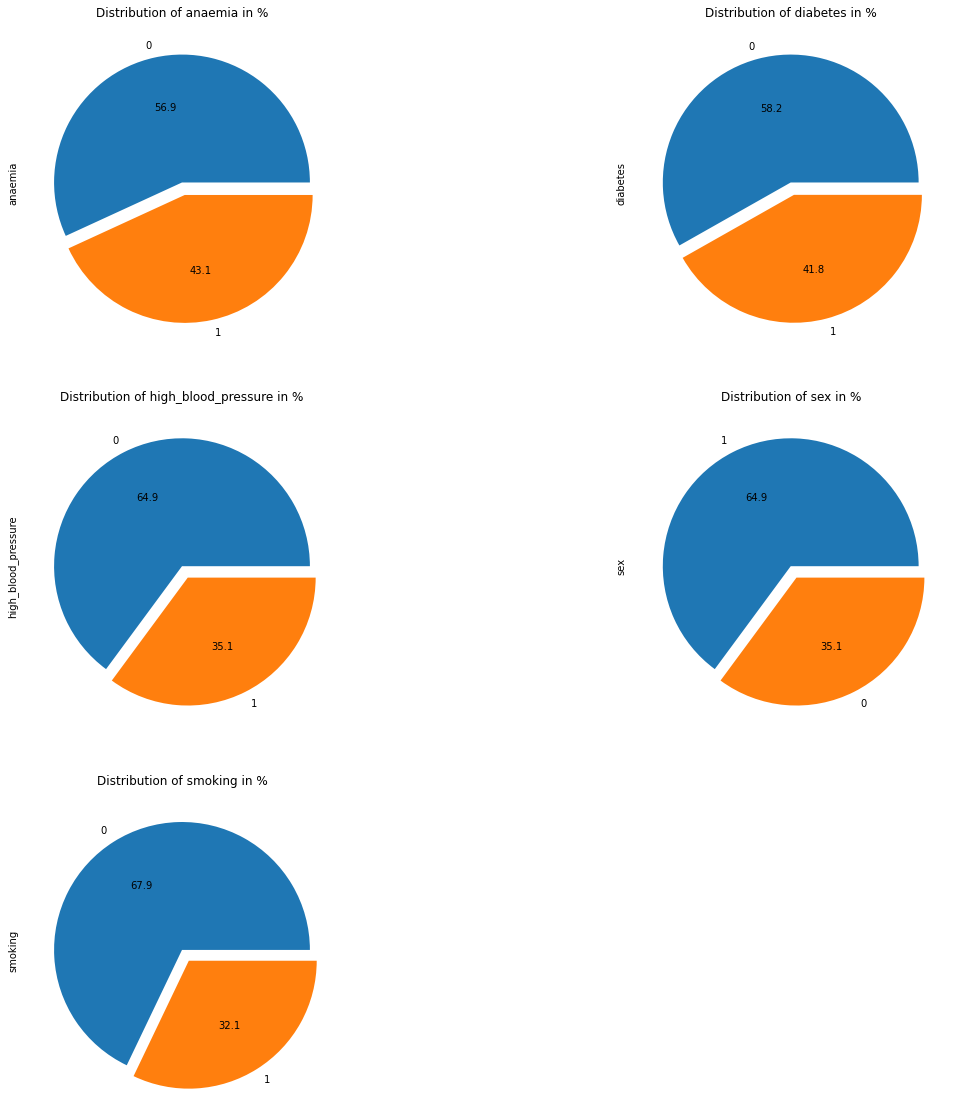

In [ ]:
#Pie plots of distribution of data in %
plt.figure(1,figsize=(20,20))
plt.subplot(321)
rawdata['anaemia'].value_counts().plot.pie(title='Distribution of anaemia in %',explode=[0,.1],autopct="%1.1f")

plt.subplot(322)
rawdata['diabetes'].value_counts().plot.pie(title='Distribution of diabetes in %',explode=[0,.1],autopct="%1.1f")

plt.subplot(323)
rawdata['high_blood_pressure'].value_counts().plot.pie(title='Distribution of high_blood_pressure in %',explode=[0,.1],autopct="%1.1f")

plt.subplot(324)
rawdata['sex'].value_counts().plot.pie(title='Distribution of sex in %',explode=[0,.1],autopct="%1.1f")

plt.subplot(325)
rawdata['smoking'].value_counts().plot.pie(title='Distribution of smoking in %',explode=[0,.1],autopct="%1.1f")
plt.show()

From the bar and pie plots, it could be concluded that most of the patients are **male**. They **do not have anaemia, diabetes and high blood pressure** in their medical history. Besides, the majority of patients **do not have smoking habits**. 

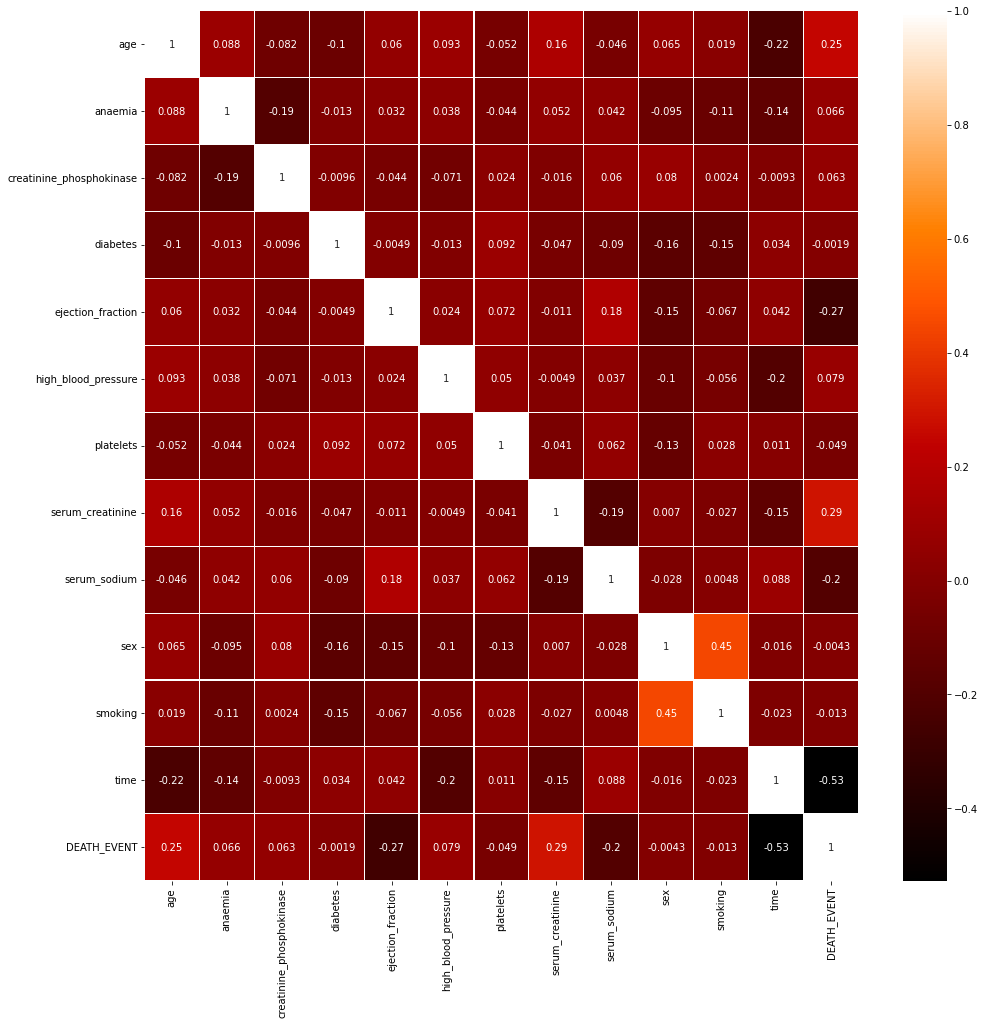

In [ ]:
#Correlation analysis to understand the influence of each feature 
plt.figure(figsize= (16,16))
sn.heatmap(rawdata.corr(), linewidth=0.1, annot= True,cmap= 'gist_heat')
plt.show()

From the heatmap above, it is seen that most features are **uncorrelated with each other**. There is a slight positive correlation between sex and smoking with the figure of 0.45.


#**Data preparation**
In this part, I split out the original dataset into training data and testing data to prepare for training the model of the predictive system. 

In [ ]:
#Splitting the data set into dependent and independent attributes
X = rawdata.drop(columns= 'DEATH_EVENT', axis= 1)
Y = rawdata['DEATH_EVENT']

In [ ]:
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [ ]:
#Splitting data set into training and test sets (80% of the data will be used to train the model and the rest 20% will be used for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, test_size= 0.20, stratify=Y, random_state= 109 )

In [ ]:
print(X.shape)
print("X_train Shape:", X_train.shape)
print("Y_train Shape:", Y_train.shape)
print("X_test Shape:", X_test.shape)
print("Y_test Shape:", Y_test.shape)

(299, 12)
X_train Shape: (239, 12)
Y_train Shape: (239,)
X_test Shape: (60, 12)
Y_test Shape: (60,)


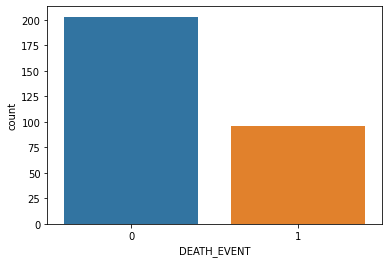

In [11]:
#Checking the distribution of Target Variable
rawdata['DEATH_EVENT'].value_counts()
sn.countplot(x='DEATH_EVENT',data=rawdata)

In [ ]:
print('Original dataset shape %s' % Counter(Y_train.values.ravel()))

Original dataset shape Counter({0: 162, 1: 77})


From the above analysis, it is clear that in the training set, the figure for 1- death event (77) is numerously less than the number of 0- survival cases (162). **This imbalance in data groups could lead to biases and the probability that the machine learning model will wrongly predict the patient to be 0 rather than 1 will increase.**  

To deal with this scenario, the training data set will be balanced by generating more events of the minor class which is 1- death event. I choose **the Synthetic Minority Oversampling Technique (SMOTE) algorithm** as follows. 


##Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
# Implement SMOTE
sampling = SMOTE(random_state = 100)
X_train, Y_train = sampling.fit_resample(X_train.values, Y_train.values.ravel())
    
# Shuffle the data
perms = np.random.permutation(X_train.shape[0])
X_train = X_train[perms]
Y_train = Y_train[perms]

X_train = pd.DataFrame(data = X_train)
Y_train = pd.DataFrame(data = Y_train)

print(X_train.shape)
print(Y_train.shape)

(324, 12)
(324, 1)


In [ ]:
print('Resampled dataset shape %s' % Counter(Y_train.values.ravel()))

Resampled dataset shape Counter({1: 162, 0: 162})


**As the result of applying SMOTE, the training data is now balanced with 162 records in both classes.**

SMOTE provides an equal number of data points for both death events and survival cases which then, prevents biases in the training phase of the model.  

As all variables in the data set have different ranges, normalization is an indispensable part of data preparation. **This step will increase the numerical stability and lessen the amount of time needed for training process.** 

In [ ]:
#Data normalization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#**Modeling**
I use the training dataset split from the original dataset to fit in the Logistics Regression model for training.  



In [ ]:
model= LogisticRegression()

In [ ]:
#Training the Logistics Regression model with training data set
model.fit(X_train, Y_train.values.ravel())

LogisticRegression()

#**Evaluation: Confusion Matrix and Classification Report**
The evaluation of the model is assessed by calculating the accuracy score of both training and testing datasets. 


In [ ]:
#Accuracy on training data
pred_train= model.predict(X_train)
score= accuracy_score(Y_train, pred_train)
tn,fp,fn,tp= confusion_matrix(Y_train,pred_train).ravel()
print(tn,fp,fn,tp)
matrix= classification_report(Y_train,pred_train)
print(matrix)

137 25 22 140
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       162
           1       0.85      0.86      0.86       162

    accuracy                           0.85       324
   macro avg       0.86      0.85      0.85       324
weighted avg       0.86      0.85      0.85       324



In [ ]:
#Accuracy on test data
pred= model.predict(X_test)
score= accuracy_score(Y_test, pred)
tn,fp,fn,tp= confusion_matrix(Y_test,pred).ravel()
print(tn,fp,fn,tp)
matrix= classification_report(Y_test,pred)
print(matrix)


27 14 5 14
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        41
           1       0.50      0.74      0.60        19

    accuracy                           0.68        60
   macro avg       0.67      0.70      0.67        60
weighted avg       0.73      0.68      0.69        60



**The accuracy score of training data is 0.85 and of testing data is 0.68.** Although the correctness of predicting the training data is high, the score for testing data is quite low. This issue will be taken into account in the reflection part. 

#**Building the predictive system**


In [ ]:
input_data= (60,0,1211,1,35,0,263358.03,1.8,113,1,1,186)

#Change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#Reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predictive_model = model.predict(input_data_reshaped)
print(predictive_model)

if (predictive_model[0]==0):
  print('This patient is at LOW risk of heart failure')
else:
  print ('This patient is at HIGH risk of heart failure')

[0]
This patient is at LOW risk of heart failure


If we put random data as input data in the sequence of variables as given in the original dataset and run the code chunk above, the outcome would be 0 or 1 which then, gives out the prediction of probability of death events occuring. 

#**Reflection**
##Results
The project consists of data analyses, data exploration and most importantly, the predictive system based on Logistics Regression model. 

The system takes 12 different variables indicated in patients' clinical records as the independent attributes to predict the mortality of the patient based on classification techniques.  

Through the project, it is obvious that models created by applying machine learning algorithms could lessen the time needed for the prediction of death event which would be a great help for hospitals in medical diagnosis and precautions.

##Future improvements
* **The amount of data:** 

Through analyses, it could be seen that the data set indicates a significant imbalance between death events and survival cases. Although this issue has been dealt by using SMOTE technique, SMOTE could only balance the number of records for both classes and the amount of data remains limited. 

This also affects the performance, accuracy and correctness of the model to a certain extent as the model does not have a large amount of data to train and test the effectiveness and efficiency of the model. **When more data is available and collected, the model will be better trained and tested which would increase the accuracy score.** 

* **Application of other algorithms**

This project is mainly focused on using Logistics Regression as the key machine learning model. However, it would be a good direction of improving and expanding the project by continuing conducting the predictive system with application of different classification models such as Gaussian Naive Bayes, Decision Tree, Random Forest and Gradient Boosting. 

By applying various algorithms in training and testing the predictive system, we can evaluate their accuracy scores to see which would be the best one to choose to build the system. 

#**References**

Anemia associated with chronic heart failure: current concepts. (2013, February 4). NCBI. Retrieved January 15, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3569049/

Cardiovascular diseases. (n.d.). World Health Organization (WHO). Retrieved January 10, 2023, from https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1

Creatine Phosphokinase (CPK). (n.d.). Johns Hopkins Lupus Center. Retrieved January 15, 2023, from https://www.hopkinslupus.org/lupus-tests/clinical-tests/creatine-phosphokinase-cpk/

Creatine Phosphokinase - StatPearls. (n.d.). NCBI. Retrieved January 15, 2023, from https://www.ncbi.nlm.nih.gov/books/NBK546624/

Heart failure clinical records Data Set. (2020, February 5). UCI Machine Learning Repository. Retrieved January 14, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Heart failure in type 2 diabetes: current perspectives on screening, diagnosis and management - Cardiovascular Diabetology. (2021, November 6). Cardiovascular Diabetology. Retrieved January 15, 2023, from https://cardiab.biomedcentral.com/articles/10.1186/s12933-021-01408-1

Heart Failure - What Is Heart Failure? (2022, March 24). NHLBI. Retrieved January 10, 2023, from https://www.nhlbi.nih.gov/health/heart-failure

Machine Learning - Logistic Regression. (n.d.). Tutorialspoint. Retrieved January 14, 2023, from https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_logistic_regression.htm

Perry, I. (n.d.). Serum creatinine concentration and risk of cardiovascular disease: a possible marker for increased risk of stroke. PubMed. Retrieved January 15, 2023, from https://pubmed.ncbi.nlm.nih.gov/9056611/

The prognosis of heart failure patients: Does sodium level play a significant role? (2018, November 8). NCBI. Retrieved January 15, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6224129/

Us. (2019, September 26). YouTube. Retrieved January 15, 2023, from https://academic.oup.com/eurheartj/article/27/22/2623/2887328?login=false

Varma, A., Luo, E. K., & Krans, B. (n.d.). Ejection Fraction: Normal Range, Low Range, and Treatment. Healthline. Retrieved January 15, 2023, from https://www.healthline.com/health/ejection-fraction#heart-failure